In [1]:
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [42]:
snippets = pd.read_csv('/home/pc/DevD/InsectEavesdropper/Data/final_features.csv')
snippets['snippets'] = snippets['snippets'].apply(str.strip,args=('[]',)).apply(np.fromstring,dtype=float, sep=' ')

In [44]:
data = snippets['snippets']

In [52]:
snippets.to_csv('/home/pc/DevD/InsectEavesdropper/Data/final.csv', index=False)

In [53]:
snippets

file_name insect_name  \
0     ECB/ECB16_35overnight_04_02_2023_21_45_542hour...         ECB   
1     ECB/ECB16_35overnight_04_02_2023_21_45_542hour...         ECB   
2     ECB/ECB16_35overnight_04_02_2023_21_45_542hour...         ECB   
3     ECB/ECB16_35overnight_04_02_2023_21_45_542hour...         ECB   
4     ECB/ECB16_35overnight_04_02_2023_21_45_542hour...         ECB   
...                                                 ...         ...   
4861                            Manduca/1insectleaf.wav     Manduca   
4862                            Manduca/1insectleaf.wav     Manduca   
4863                            Manduca/1insectleaf.wav     Manduca   
4864                            Manduca/1insectleaf.wav     Manduca   
4865                            Manduca/1insectleaf.wav     Manduca   

           type  thres_signal        merged_intervals  \
0     Treatment      0.000042    (29424307, 29424310)   
1     Treatment      0.000042    (53345594, 53345594)   
2     Treatment      0.000044    (26109591, 26109640)   
3     Treatment      0.000044        (168266, 168266)   
4     Treatment      0.000044        (226107, 226110)   
...         ...           ...                     ...   
4861  Treatment      0.000049  (149578541, 149578579)   
4862  Treatment      0.000049  (149579056, 149579288)   
4863  Treatment      0.000049  (150711251, 150711289)   
4864  Treatment      0.000049  (155153657, 155153659)   
4865  Treatment      0.000049  (155672983, 155672987)   

                                               snippets  length       max  
0     [-4.10550042e-05, -5.82546334e-05, -5.10704673...       3  0.000474  
1     [-1.90643392e-05, -8.44016815e-05, -5.64928511...       0  0.000362  
2     [-4.2880372e-05, -4.20272192e-05, 1.14258627e-...      49  0.001070  
3     [-8.59150223e-05, -0.000108132796, -4.6945132e...       0  0.000383  
4     [1.00036214e-05, -1.55761032e-05, -1.60182158e...       3  0.000497  
...                                                 ...     ...       ...  
4861  [-0.000128109411, -0.000269123143, -0.00022169...      38  0.000610  
4862  [7.98622184e-05, -0.000120586413, -0.000181741...     232  0.000619  
4863  [4.30690703e-05, -1.33006091e-05, -2.28670699e...      38  0.000568  
4864  [8.88649325e-05, 3.86670956e-06, -0.0001281270...       2  0.000505  
4865  [-2.01370344e-05, -2.75314115e-05, -4.44679651...       4  0.000576  

[4866 rows x 8 columns]

In [54]:
df = snippets

In [97]:
df = df[df['type'] == 'Treatment']

In [59]:
df['intensity'] = df['max']

df

In [74]:
dfc

file_name insect_name  \
229   Cornworm/cornplant26plant33_04_01_2023_15_25_0...    Cornworm   
230   Cornworm/cornplant26plant33_04_01_2023_15_25_0...    Cornworm   
231   Cornworm/cornplant26plant33_04_01_2023_15_25_0...    Cornworm   
232   Cornworm/cornplant26plant33_04_01_2023_15_25_0...    Cornworm   
233   Cornworm/cornplant9plant13_03_31_2023_15_55_08...    Cornworm   
...                                                 ...         ...   
2290  Cornworm/cornplant36plant28_03_31_2023_19_05_2...    Cornworm   
2291  Cornworm/cornplant36plant28_03_31_2023_19_05_2...    Cornworm   
2292  Cornworm/cornplant36plant28_03_31_2023_19_05_2...    Cornworm   
2293  Cornworm/cornplant36plant28_03_31_2023_19_05_2...    Cornworm   
2294  Cornworm/cornplant36plant28_03_31_2023_19_05_2...    Cornworm   

           type  thres_signal      merged_intervals  \
229   Treatment      0.001212      (353019, 353032)   
230   Treatment      0.001212      (460720, 460910)   
231   Treatment      0.001212      (463614, 463658)   
232   Treatment      0.001212      (463937, 465191)   
233     Control      0.000041      (148122, 148150)   
...         ...           ...                   ...   
2290  Treatment      0.000043  (27622796, 27622800)   
2291  Treatment      0.000043  (33627116, 33627116)   
2292  Treatment      0.000043  (36499057, 36499085)   
2293  Treatment      0.000043  (58804500, 58804500)   
2294  Treatment      0.000043  (66532719, 66532722)   

                                               snippets  length       max  \
229   [-4.10922473e-05, 1.44693485e-05, -2.2987288e-...     313  0.021580   
230   [-0.000534200874, -0.000553968457, -0.00055415...     490  1.073077   
231   [0.00195862656, 0.00190027343, 0.00171303044, ...     344  0.013380   
232                [0.00296465, 0.00316533, 0.00298674]       3  1.234333   
233   [-1.20986206e-05, -1.87752163e-05, 2.15912222e...     328  0.001180   
...                                                 ...     ...       ...   
2290  [-1.86561946e-05, -3.86329473e-05, -1.73346359...     304  0.000565   
2291  [6.05429124e-05, 2.37895033e-05, -8.08449184e-...     300  0.000660   
2292  [8.20898478e-05, 1.67382671e-05, 6.20706738e-0...     328  0.001963   
2293  [-4.83787946e-05, -2.15159801e-05, -4.96723738...     300  0.000445   
2294  [-6.71173223e-05, 1.13595055e-05, -4.29677951e...     303  0.000496   

      intensity  lenght  
229    0.021580     313  
230    1.073077     490  
231    0.013380     344  
232    1.234333       3  
233    0.001180     328  
...         ...     ...  
2290   0.000565     304  
2291   0.000660     300  
2292   0.001963     328  
2293   0.000445     300  
2294   0.000496     303  

[2001 rows x 10 columns]

In [56]:
# Equation for damped oscillator
def damped_oscillator(x, m, c, p):
    return (-2*m/c)*(np.log(0.0001)-np.log(x)) - p

# Initial curve fit




# Find any outliers (generally caused by double events)


In [83]:
np.std(df['intensity'])

0.04457174642242707

In [115]:
dfc = df[df['insect_name'] == 'Cornworm']
dfc = dfc[dfc['length'] > 300]
dfc = dfc[dfc['intensity'] > 0.003]

In [116]:
dfc

file_name insect_name  \
229   Cornworm/cornplant26plant33_04_01_2023_15_25_0...    Cornworm   
230   Cornworm/cornplant26plant33_04_01_2023_15_25_0...    Cornworm   
231   Cornworm/cornplant26plant33_04_01_2023_15_25_0...    Cornworm   
252   Cornworm/cornplant9plant13_03_31_2023_15_55_08...    Cornworm   
362   Cornworm/cornplant33plant31_03_31_2023_22_13_3...    Cornworm   
...                                                 ...         ...   
2264  Cornworm/cornplant3plant4_03_30_2023_19_46_222...    Cornworm   
2265  Cornworm/cornplant3plant4_03_30_2023_19_46_222...    Cornworm   
2266  Cornworm/cornplant3plant4_03_30_2023_19_46_222...    Cornworm   
2269  Cornworm/cornplant3plant4_03_30_2023_19_46_222...    Cornworm   
2270  Cornworm/cornplant3plant4_03_30_2023_19_46_222...    Cornworm   

           type  thres_signal      merged_intervals  \
229   Treatment      0.001212      (353019, 353032)   
230   Treatment      0.001212      (460720, 460910)   
231   Treatment      0.001212      (463614, 463658)   
252     Control      0.000041    (8573308, 8573514)   
362   Treatment      0.000047    (3164574, 3164667)   
...         ...           ...                   ...   
2264    Control      0.000535  (67628609, 67628645)   
2265    Control      0.000535  (67637917, 67638058)   
2266    Control      0.000535  (67640205, 67640206)   
2269    Control      0.000535  (67728527, 67728541)   
2270    Control      0.000535  (67733053, 67733060)   

                                               snippets  length       max  \
229   [-4.10922473e-05, 1.44693485e-05, -2.2987288e-...     313  0.021580   
230   [-0.000534200874, -0.000553968457, -0.00055415...     490  1.073077   
231   [0.00195862656, 0.00190027343, 0.00171303044, ...     344  0.013380   
252   [2.04830982e-05, 6.94245168e-06, -2.1050152e-0...     506  0.013011   
362   [-2.66570339e-05, 1.06076661e-06, -1.45039135e...     393  0.007535   
...                                                 ...     ...       ...   
2264  [-0.000242529414, -0.000270256724, -0.00015022...     336  0.017034   
2265  [-0.000455555147, -0.000248506703, -7.03596294...     441  0.048168   
2266  [-0.000323102591, -0.000238188724, -0.00023445...     301  0.004654   
2269  [-3.42020703e-07, -3.63210146e-05, -7.71766424...     314  0.015460   
2270  [0.00142498301, 0.000773693595, 0.000447127013...     307  0.005248   

      intensity  lenght  
229    0.021580     313  
230    1.073077     490  
231    0.013380     344  
252    0.013011     506  
362    0.007535     393  
...         ...     ...  
2264   0.017034     336  
2265   0.048168     441  
2266   0.004654     301  
2269   0.015460     314  
2270   0.005248     307  

[368 rows x 10 columns]

In [120]:
for insect_type, snippets in dfc.groupby('insect_name'):

    params, _ = curve_fit(damped_oscillator, snippets['intensity'], snippets['length'])
    m, c, p = params

    y_fit = [damped_oscillator(x, m, c, p) for x in snippets['intensity']]
    residuals = snippets['length'] - y_fit
    threshold = 2 * np.std(residuals)
    outliers = np.abs(residuals) > threshold

    # Plot intensity/length of data with trend line
    x_vals = np.arange(min(snippets['intensity']),max(snippets['intensity']),max(snippets['intensity'])/100)
    y = [damped_oscillator(x, m, c, p) for x in x_vals]
    plt.plot(x_vals, y)
    plt.scatter(snippets['intensity'], snippets['length'])

    # Add labels and legend
    plt.xlabel('Intensity')
    plt.ylabel('length')
    plt.title(f'Scatter Plot of {insect_type} Length  vs. Intensity')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


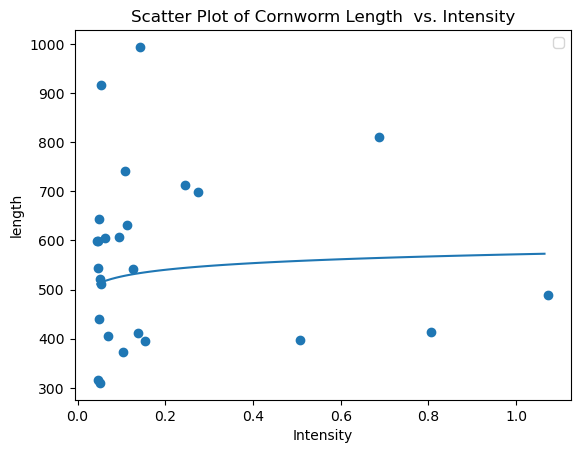

In [113]:
for insect_type, snippets in dfc.groupby('insect_name'):

    params, _ = curve_fit(damped_oscillator, snippets['intensity'], snippets['length'])
    m, c, p = params

    y_fit = [damped_oscillator(x, m, c, p) for x in snippets['intensity']]
    residuals = snippets['length'] - y_fit
    threshold = 2 * np.std(residuals)
    outliers = np.abs(residuals) > threshold

    # Fit again minus the outliers
    params, _ = curve_fit(damped_oscillator, snippets[~outliers]['intensity'], snippets[~outliers]['length'])
    m, c, p = params
    

    # Pearson R of fit
    yfit = [damped_oscillator(x, m, c, p) for x in snippets['intensity']]
    r, pval = pearsonr(snippets['length'], yfit)
    if pval < 0.0001:
        pval = '< 0.0001'
    else:
        pval = round(pval,4)
    rsquare = r**2

    # Plot intensity/length of data with trend line
    x_vals = np.arange(min(snippets['intensity']),max(snippets['intensity']),max(snippets['intensity'])/100)
    y = [damped_oscillator(x, m, c, p) for x in x_vals]
    plt.plot(x_vals, y)
    plt.scatter(snippets['intensity'], snippets['length'])

    # Add labels and legend
    plt.xlabel('Intensity')
    plt.ylabel('length')
    plt.title(f'Scatter Plot of {insect_type} Length  vs. Intensity')
    plt.legend()
    plt.show()